In [55]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [56]:
# load data
df_tree = pd.read_csv('data/df_tree.csv')
df_income = pd.read_csv('data/df_income.csv')
df_education = pd.read_csv('data/df_education.csv')

In [57]:
# Get average number of years in education per district
grundskole = 10
erhvervsfaglig = grundskole + 2
gymnasiel = grundskole + 3
lang_videregående = gymnasiel + (5+8)/2
mellem_videregående = gymnasiel + 3

# calculate average number of study year per district
df_education['total_study_year'] = (df_education['Erhvervsfaglige og korte videregående uddannelser']*erhvervsfaglig
+ df_education['Grundskole og uoplyst mv.']*grundskole
+ df_education['Gymnasiale uddannelser og adgangsgivende uddannelsesforløb']*gymnasiel
+ df_education['Lange videregående uddannelser og Ph.d og forskeruddannelser']*lang_videregående
+ df_education['Mellemlange videregående uddannelser og bacheloruddannelser']*mellem_videregående)
df_education['total_educated'] = df_education[['Erhvervsfaglige og korte videregående uddannelser','Grundskole og uoplyst mv.','Gymnasiale uddannelser og adgangsgivende uddannelsesforløb','Lange videregående uddannelser og Ph.d og forskeruddannelser','Mellemlange videregående uddannelser og bacheloruddannelser']].sum(axis=1)
df_education['avg_study_year'] = df_education.total_study_year/df_education.total_educated

In [81]:
data_tree = (df_tree.groupby(['year','district']).size()).reset_index()
df_species = df_tree[['year','district','species']].groupby(['year','district']).nunique()
df_species =  df_species.reset_index()
df_tree_merged = pd.merge(data_tree,df_species)
df_tree_merged

,year,district,0,species
0,2000.0,Amager Vest,20,7
1,2000.0,Amager Øst,67,10
2,2000.0,Bispebjerg,19,6
3,2000.0,Brønshøj-Husum,28,5
4,2000.0,Indre By,68,9
...,...,...,...,...
222,2022.0,Nørrebro,56,10
223,2022.0,Valby,72,13
224,2022.0,Vanløse,51,9
225,2022.0,Vesterbro-Kongens Enghave,9,2


In [84]:
df_type = df_tree[['year','district','type','id']].groupby(['year','district','type']).count()
data_type = (df_type.pivot_table(index=['year','district'],columns='type', values='id')).reset_index()
data_type = data_type.fillna(0)
data_type = data_type.drop(columns='0')
data_type

type,year,district,Formede træer,Gade- og allétræer,Park- og naturtræer,Private træer,Træer i bevoksninger
0,2000.0,Amager Vest,0.0,18.0,2.0,0.0,0.0
1,2000.0,Amager Øst,0.0,66.0,1.0,0.0,0.0
2,2000.0,Bispebjerg,0.0,11.0,2.0,0.0,6.0
3,2000.0,Brønshøj-Husum,0.0,28.0,0.0,0.0,0.0
4,2000.0,Indre By,0.0,43.0,10.0,12.0,3.0
...,...,...,...,...,...,...,...
222,2022.0,Nørrebro,0.0,45.0,11.0,0.0,0.0
223,2022.0,Valby,0.0,51.0,2.0,0.0,19.0
224,2022.0,Vanløse,0.0,13.0,38.0,0.0,0.0
225,2022.0,Vesterbro-Kongens Enghave,0.0,2.0,7.0,0.0,0.0


In [93]:
df_tree_merged = pd.merge(df_tree_merged, data_type)
df_tree_merged.columns = ['year','district','number_planted_trees','number_unique_species','Formede træer','Gade- og allétræer','Park- og naturtræer','Private træer', 'Træer i bevoksninger']

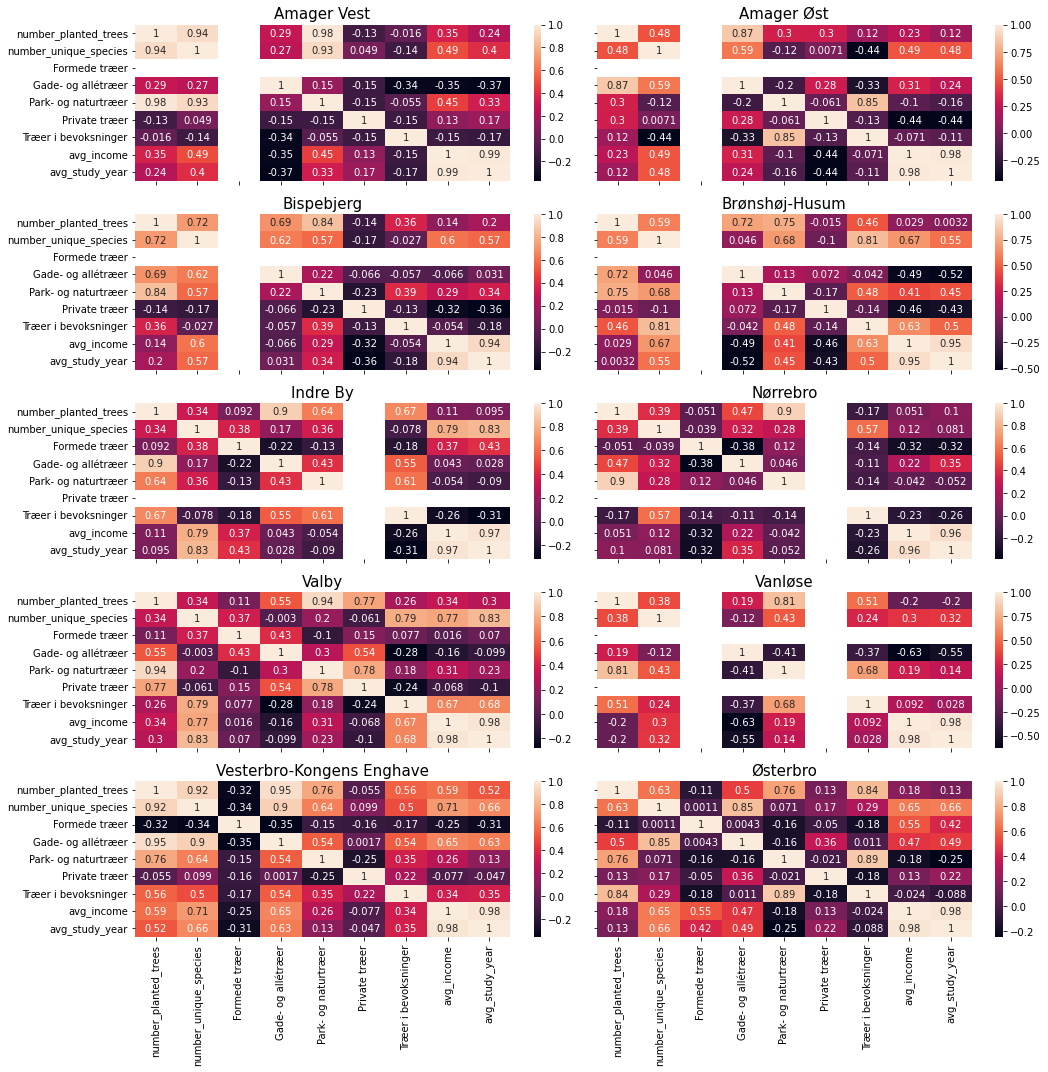

In [100]:
df_genial = pd.merge(pd.merge(df_tree_merged,df_income),df_education[['year','district','avg_study_year']])
districts = df_genial.district.unique()
num_features = df_genial.columns[2:]
fig, axes = plt.subplots(5,2, figsize = (15,15), sharey=True)
rows = [0,0,1,1,2,2,3,3,4,4]
columns = [0,1,0,1,0,1,0,1,0,1]
i = 0
j = 0
for dist in districts:
    temp = df_genial[df_genial.district == dist][num_features]
    temp.columns = ['number_planted_trees','number_unique_species','Formede træer','Gade- og allétræer', 'Park- og naturtræer', 'Private træer','Træer i bevoksninger','avg_income','avg_study_year']
    corr = temp.corr()
    sns.heatmap(corr, annot=True, ax=axes[rows[i],columns[j]])
    axes[rows[i],columns[j]].set_title(dist, fontsize=15)
    if rows[i] != 4:
        axes[rows[i],columns[j]].set_xticklabels('')
    i = i+1
    j = j+1
plt.tight_layout()
plt.show()

In [104]:
print((df_genial[df_genial['district']=='Vanløse']['Formede træer'] == 0).sum())
df_genial[df_genial['district']=='Vanløse'].shape[0]

13


13